# Image Basics

width: 693 pixels, height: 446 piexles, channels: 3


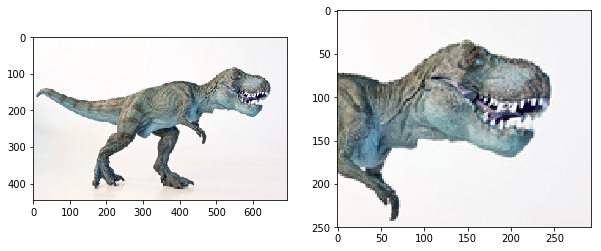

In [1]:
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image_location = 'trex.png'
image = cv2.imread(image_location)
print("width: {} pixels, height: {} piexles, channels: {}".format(image.shape[1], image.shape[0], image.shape[2]))

#cv2.imwrite("newimage.jpg", image)
corner = image[50:300,400:700]
fig = plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(image)

plt.subplot(122)
plt.imshow(corner)

# Drawing

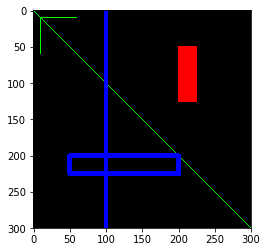

In [2]:
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

canvas = np.zeros((300, 300, 3), dtype = "uint8")

green = (0, 255, 0)
cv2.line(canvas, (0, 0), (300, 300), green)

red = (0, 0, 255)
cv2.line(canvas, (100, 0), (100, 300), red, 3)

cv2.rectangle(canvas, (10, 10), (60, 60), green)

cv2.rectangle(canvas, (50, 200), (200, 225), red, 5)

blue = (255, 0, 0)
cv2.rectangle(canvas, (200, 50), (225, 125), blue, -1)

plt.imshow(canvas)

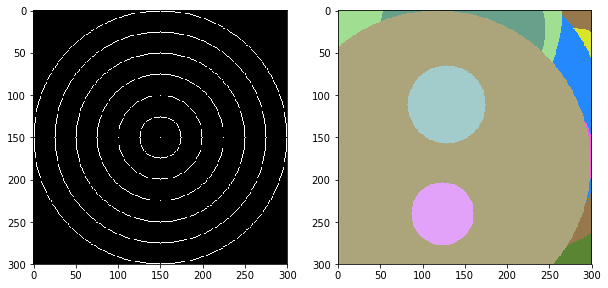

In [3]:
from __future__ import print_function
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

canvas = np.zeros((300, 300, 3), dtype = "uint8")
(centerX, centerY) = (canvas.shape[1] //2, canvas.shape[0] //2)
white = (255, 255, 255)

for r in range(0, 175, 25):
    cv2.circle(canvas, (centerX, centerY), r, white)
fig = plt.figure(figsize=(10, 15))
plt.subplot(121)
plt.imshow(canvas)

for i in range(0, 25):
    radius = np.random.randint(5, high = 200)
    color = np.random.randint(0, high = 256, size =(3,)).tolist()
    pt = np.random.randint(0, high = 300, size = (2,))
    cv2.circle(canvas, tuple(pt), radius, color, -1)
    
plt.subplot(122)
plt.imshow(canvas)

# Image Processing

Text(0.5,1,'Resized')

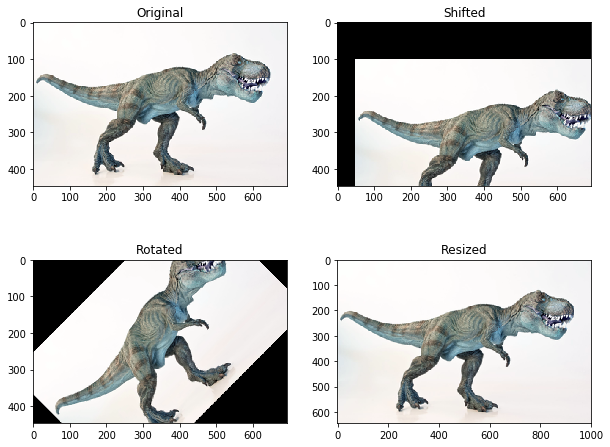

In [4]:
import cv2
#import imutils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def translate(image, x, y):
    M = np.float32([[1, 0, x], [0, 1, y]])
    shifted = cv2.warpAffine(image, M, (image.shape[1], image.shape[0]))
    return shifted

def rotate(image, angle, center = None, scale = 1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w/2, h/2)
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    dim = None
    (h, w) = image.shape[:2]
    if width is None and height is None:
        return image
    if width is None:
        r = height / float(h)
        dim = (int(w *r), height)
    else:
        r = width / float(w)
        dim = (width, int(h *r))
    resized = cv2.resize(image, dim, interpolation = inter)
    return resized
    
fig = plt.figure(figsize=(10, 8))
image_location = 'trex.png'
image = cv2.imread(image_location)
plt.subplot(221)
plt.imshow(image)
plt.title("Original")

shifted = translate(image, 50, 100)
plt.subplot(222)
plt.imshow(shifted)
plt.title("Shifted")

rotated = rotate(image, 45)
plt.subplot(223)
plt.imshow(rotated)
plt.title("Rotated")

resized = resize(image, width = 1000)
plt.subplot(224)
plt.imshow(resized)
plt.title("Resized")

Text(0.5,1,'Flipped Vert & Hori')

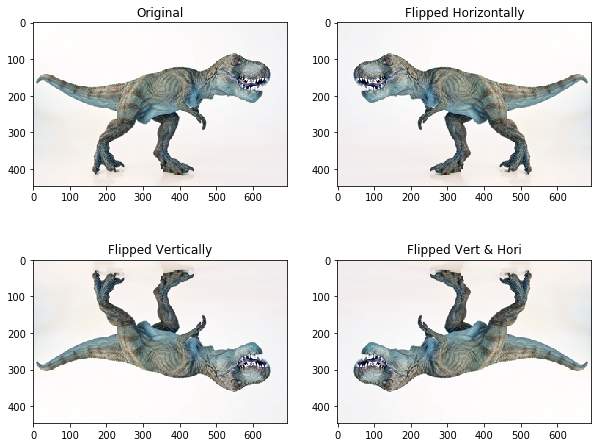

In [5]:
import cv2
#import imutils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
image_location = 'trex.png'
image = cv2.imread(image_location)
plt.subplot(221)
plt.imshow(image)
plt.title("Original")

flipped_hori = cv2.flip(image, 1)
plt.subplot(222)
plt.imshow(flipped_hori)
plt.title("Flipped Horizontally")

flipped_vert = cv2.flip(image, 0)
plt.subplot(223)
plt.imshow(flipped_vert)
plt.title("Flipped Vertically")

flipped = cv2.flip(image, -1)
plt.subplot(224)
plt.imshow(flipped)
plt.title("Flipped Vert & Hori")

max of 255: [[255]]
min of 0: [[0]]
wrap around: [44]
wrap around: [206]


Text(0.5,1,'Subtracted')

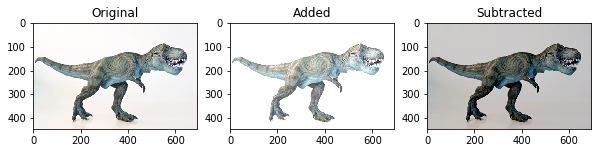

In [6]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
image_location = 'trex.png'
image = cv2.imread(image_location)
plt.subplot(131)
plt.imshow(image)
plt.title("Original")

print("max of 255: {}".format(cv2.add(np.uint8([200]), np.uint8([100]))))
print("min of 0: {}".format(cv2.subtract(np.uint8([50]), np.uint8([100]))))
print("wrap around: {}".format(np.uint8([200]) + np.uint8([100])))
print("wrap around: {}".format(np.uint8([50]) - np.uint8([100])))

plt.subplot(132)
M = np.ones(image.shape, dtype = "uint8") * 50
added = cv2.add(image, M)
plt.imshow(added)
plt.title("Added")

plt.subplot(133)
M = np.ones(image.shape, dtype = "uint8") * 50
subtracted = cv2.subtract(image, M)
plt.imshow(subtracted)
plt.title("Subtracted")

Text(0.5,1,'BOT')

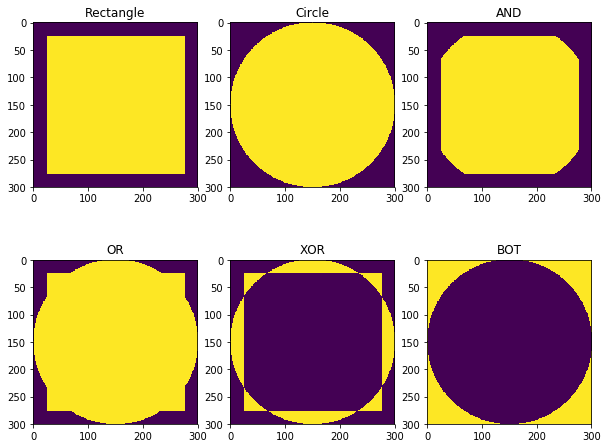

In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
rectangle = np.zeros((300, 300), dtype = "uint8")
cv2.rectangle(rectangle, (25, 25), (275, 275), 255, -1)
plt.subplot(231)
plt.imshow(rectangle)
plt.title("Rectangle")

circle = np.zeros((300, 300), dtype = "uint8")
cv2.circle(circle, (150, 150), 150, 255, -1)
plt.subplot(232)
plt.imshow(circle)
plt.title("Circle")

bitwiseAnd = cv2.bitwise_and(rectangle, circle)
plt.subplot(233)
plt.imshow(bitwiseAnd)
plt.title("AND")

bitwiseOr = cv2.bitwise_or(rectangle, circle)
plt.subplot(234)
plt.imshow(bitwiseOr)
plt.title("OR")

bitwiseXor = cv2.bitwise_xor(rectangle, circle)
plt.subplot(235)
plt.imshow(bitwiseXor)
plt.title("XOR")

bitwiseNot = cv2.bitwise_not(circle)
plt.subplot(236)
plt.imshow(bitwiseNot)
plt.title("BOT")

Text(0.5,1,'Masked')

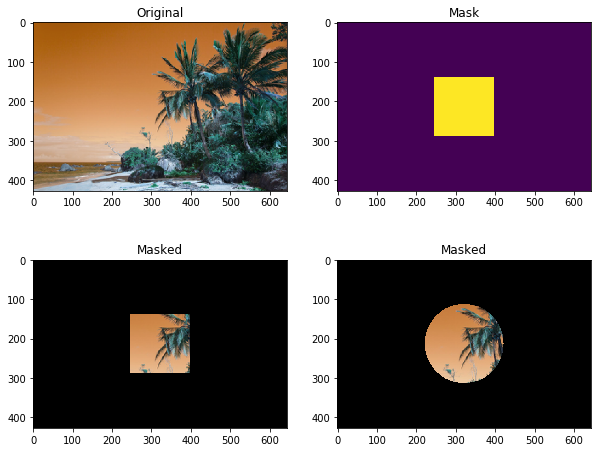

In [8]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
image_location = 'ocean.png'
image = cv2.imread(image_location)
plt.subplot(221)
plt.imshow(image)
plt.title("Original")

mask = np.zeros(image.shape[:2], dtype = "uint8")
(cX, cY) = (image.shape[1] // 2, image.shape[0] //2)
cv2.rectangle(mask, (cX - 75, cY - 75), (cX + 75, cY + 75), 255, -1)
plt.subplot(222)
plt.imshow(mask)
plt.title("Mask")

masked = cv2.bitwise_and(image, image, mask = mask)
plt.subplot(223)
plt.imshow(masked)
plt.title("Masked")

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.circle(mask, (cX, cY), 100, 255, -1)
masked = cv2.bitwise_and(image, image, mask = mask)
plt.subplot(224)
plt.imshow(masked)
plt.title("Masked")

Text(0.5,1,'Merged')

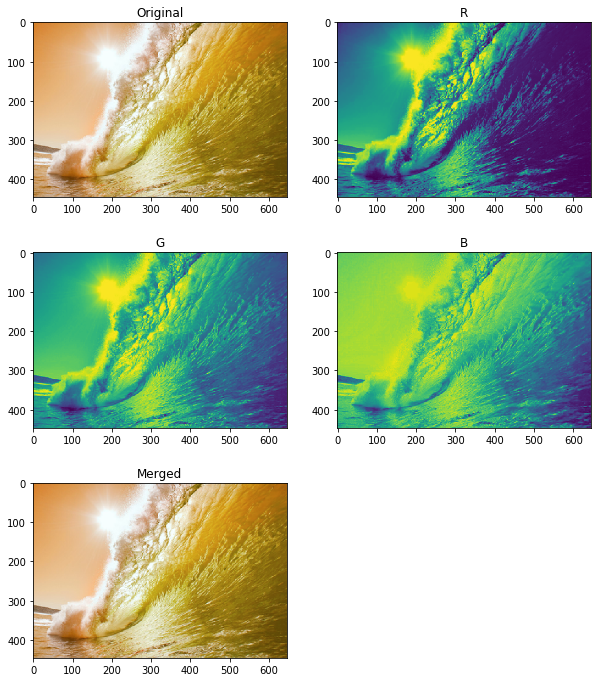

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 12))
image_location = 'ocean2.png'
image = cv2.imread(image_location)
plt.subplot(321)
plt.imshow(image)
plt.title("Original")

(B, G, R) =cv2.split(image)

plt.subplot(322)
plt.imshow(R)
plt.title("R")

plt.subplot(323)
plt.imshow(G)
plt.title("G")

plt.subplot(324)
plt.imshow(B)
plt.title("B")

merged = cv2.merge([B, G, R])
plt.subplot(325)
plt.imshow(merged)
plt.title("Merged")
#cv2.imshow("Merged", merged)

Text(0.5,1,'Lab')

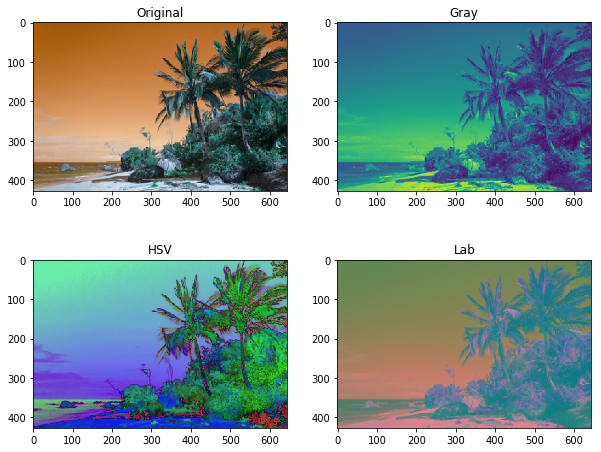

In [10]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 8))
image_location = 'ocean.png'
image = cv2.imread(image_location)
plt.subplot(221)
plt.imshow(image)
plt.title("Original")

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(222)
plt.imshow(gray)
plt.title("Gray")

hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
plt.subplot(223)
plt.imshow(hsv)
plt.title("HSV")

lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
plt.subplot(224)
plt.imshow(lab)
plt.title("Lab")

# Histograms

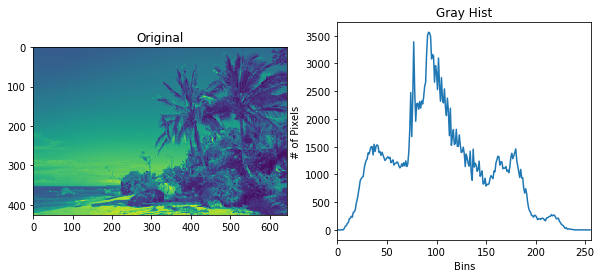

In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
fig = plt.figure(figsize=(10, 4))
image_location = 'ocean.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

hist = cv2.calcHist([image], [0], None, [256], [0, 256])
plt.subplot(122)
plt.title("Gray Hist")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])
plt.show()



3D histogram shape: (8, 8, 8), with 512 values


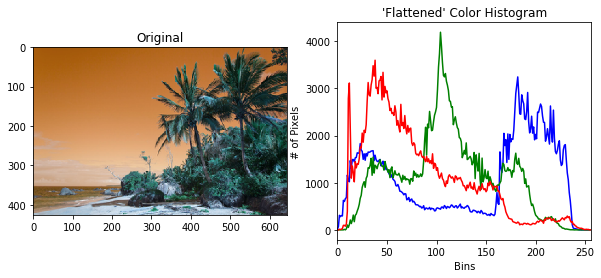

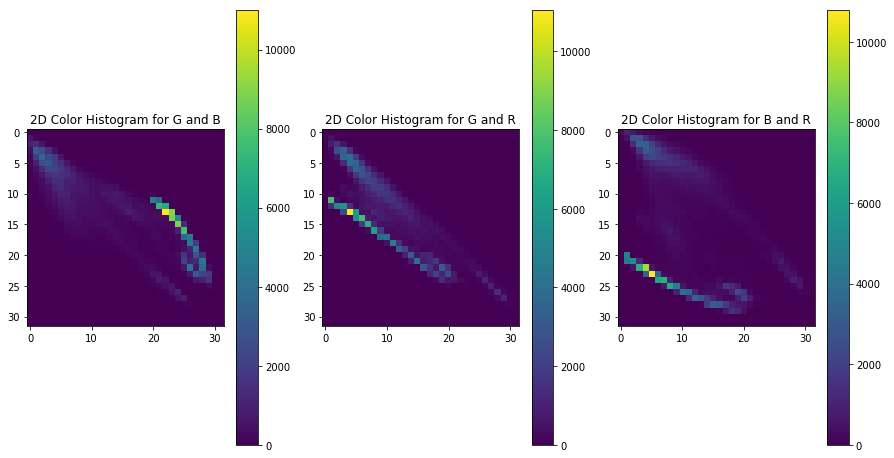

In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 4))

image_location = 'ocean.png'
image = cv2.imread(image_location)
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

chans = cv2.split(image)
colors = ("b", "g", "r")
plt.subplot(122)
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

for (chan, color) in zip(chans, colors):
    hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
    plt.plot(hist, color =color)
    plt.xlim([0, 256])
    
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32], [0, 256, 0, 256])
p = ax.imshow(hist, interpolation = "nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

hist = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
print("3D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

plt.show()


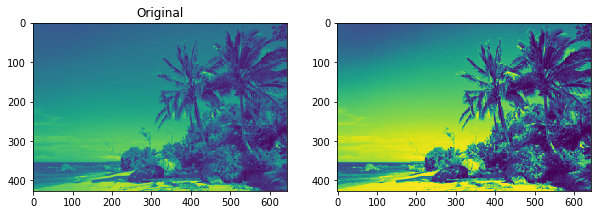

In [13]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image_location = 'ocean.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(10, 8))
plt.subplot(121)
plt.imshow(image)
plt.title("Original")

eq = cv2.equalizeHist(image)
plt.subplot(122)
plt.imshow(eq)

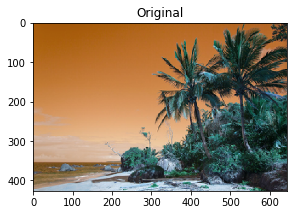

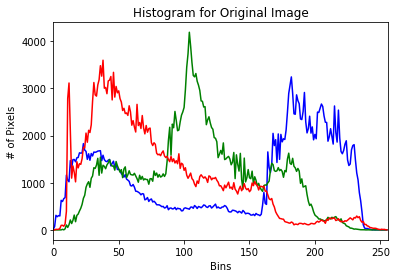

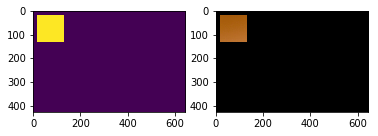

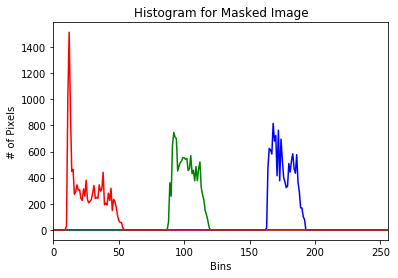

In [14]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def plot_histogram(image, title, mask = None):
    chans = cv2.split(image)
    colors = ("b", "g", "r")
    plt.figure()
    plt.title(title)
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    
    for (chans, color) in zip(chans, colors):
        hist = cv2.calcHist([chans], [0], mask, [256], [0, 256])
        plt.plot(hist, color = color)
        plt.xlim([0, 256])

fig = plt.figure(figsize=(10, 8))
image_location = 'ocean.png'
image = cv2.imread(image_location)
plt.subplot(221)
plt.imshow(image)
plt.title("Original")

plot_histogram(image, "Histogram for Original Image")

mask = np.zeros(image.shape[:2], dtype = "uint8")
cv2.rectangle(mask, (15, 15), (130, 130), 255, -1)
fig = plt.figure()
ax = fig.add_subplot(121)
ax.imshow(mask)

masked = cv2.bitwise_and(image, image, mask = mask)
bx = fig.add_subplot(122)
bx.imshow(masked)

plot_histogram(image, "Histogram for Masked Image", mask = mask)


# Smoothing and Blurring

Text(0.5,1,'Bilateral')

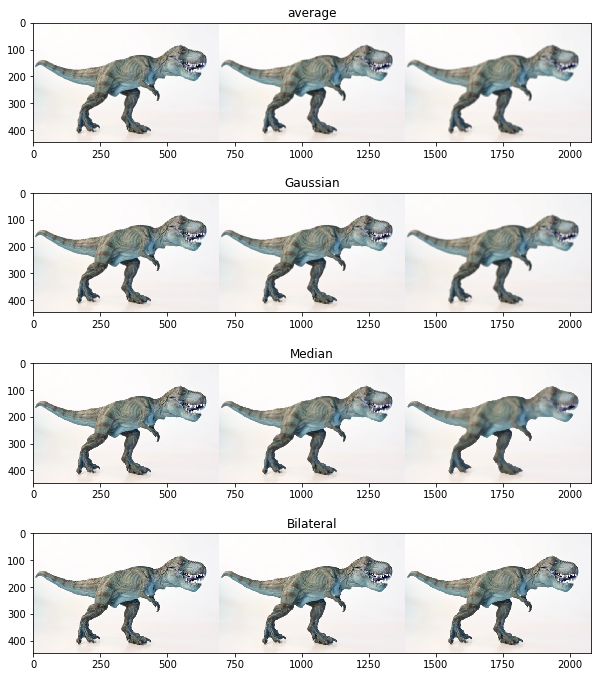

In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

image_location = 'trex.png'
image = cv2.imread(image_location)

blurred = np.hstack([cv2.blur(image, (3, 3)), cv2.blur(image, (5, 5)), cv2.blur(image, (7, 7))])
fig = plt.figure(figsize=(10, 12))
plt.subplot(411)
plt.imshow(blurred)
plt.title("average")


blurred = np.hstack([cv2.GaussianBlur(image, (3, 3), 0), cv2.GaussianBlur(image, (5, 5), 0), cv2.GaussianBlur(image, (11, 11), 0)])
plt.subplot(412)
plt.imshow(blurred)
plt.title("Gaussian")

blurred = np.hstack([cv2.medianBlur(image, 3), cv2.medianBlur(image, 5), cv2.medianBlur(image, 11)])
plt.subplot(413)
plt.imshow(blurred)
plt.title("Median")

blurred = np.hstack([cv2.bilateralFilter(image, 5, 21, 21), cv2.bilateralFilter(image, 7, 31, 31), cv2.bilateralFilter(image, 9, 41, 41)])
plt.subplot(414)
plt.imshow(blurred)
plt.title("Bilateral")

# Thresholding

Text(0.5,1,'Masked')

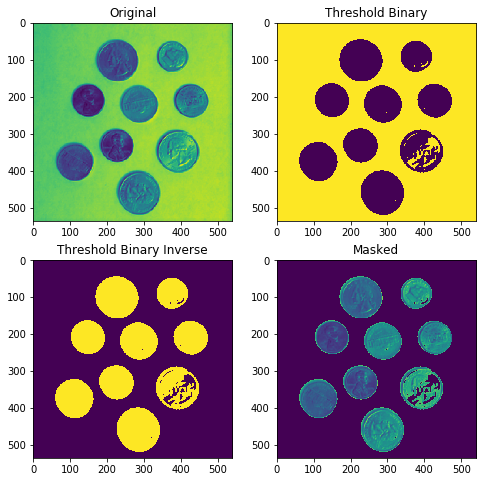

In [16]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(8, 8))

image_location = 'coin.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(221)
plt.imshow(image)
plt.title("Original")

(T, thresh) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY)
plt.subplot(222)
plt.imshow(thresh)
plt.title("Threshold Binary")

(T, threshInv) = cv2.threshold(blurred, 155, 255, cv2.THRESH_BINARY_INV)
plt.subplot(223)
plt.imshow(threshInv)
plt.title("Threshold Binary Inverse")

masked = cv2.bitwise_and(image, image, mask = threshInv)
plt.subplot(224)
plt.imshow(masked)
plt.title("Masked")

Text(0.5,1,'Gaussian Thresh')

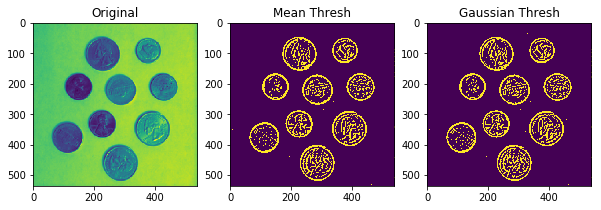

In [17]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 8))

image_location = 'coin.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(131)
plt.imshow(image)
plt.title("Original")

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)
plt.subplot(132)
plt.imshow(thresh)
plt.title("Mean Thresh")

thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)
plt.subplot(133)
plt.imshow(thresh)
plt.title("Gaussian Thresh")

Otsu's threshold: 135
Riddler-Calvard threshold: 135.64301144369492


Text(0.5,1,'Riddler-Calvard')

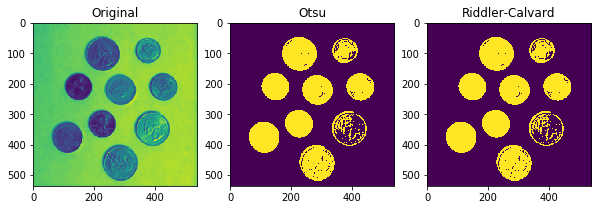

In [18]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import mahotas
%matplotlib inline

fig = plt.figure(figsize=(10, 8))

image_location = 'coin.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(131)
plt.imshow(image)
plt.title("Original")

T = mahotas.thresholding.otsu(blurred)
print("Otsu's threshold: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.subplot(132)
plt.imshow(thresh)
plt.title("Otsu")

T = mahotas.thresholding.rc(blurred)
print("Riddler-Calvard threshold: {}".format(T))
thresh = image.copy()
thresh[thresh > T] = 255
thresh[thresh < 255] = 0
thresh = cv2.bitwise_not(thresh)
plt.subplot(133)
plt.imshow(thresh)
plt.title("Riddler-Calvard")

# Gradients and Edge Detection

Text(0.5,1,'Sobel Combined')

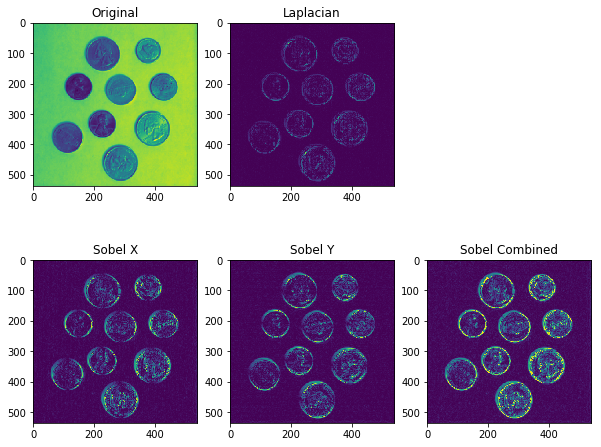

In [19]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 8))

image_location = 'coin.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.subplot(231)
plt.imshow(image)
plt.title("Original")

lap = cv2.Laplacian(image, cv2.CV_64F)
#print(lap)
lap = np.uint8(np.absolute(lap))

plt.subplot(232)
plt.imshow(lap)
plt.title("Laplacian")

sobelX = cv2.Sobel(image, cv2.CV_64F, 1, 0)
sobelY = cv2.Sobel(image, cv2.CV_64F, 0, 1)

sobelX = np.uint8(np.absolute(sobelX))
sobelY = np.uint8(np.absolute(sobelY))

sobelCombined = cv2.bitwise_or(sobelX, sobelY)

plt.subplot(234)
plt.imshow(sobelX)
plt.title("Sobel X")

plt.subplot(235)
plt.imshow(sobelY)
plt.title("Sobel Y")

plt.subplot(236)
plt.imshow(sobelCombined)
plt.title("Sobel Combined")

Text(0.5,1,'Canny')

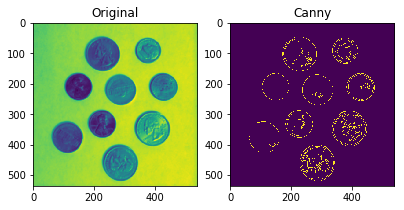

In [20]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 15))

image_location = 'coin.png'
image = cv2.imread(image_location)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(image, (5, 5), 0)

plt.subplot(131)
plt.imshow(image)
plt.title("Original")

canny = cv2.Canny(image, 30, 150)
plt.subplot(132)
plt.imshow(canny)
plt.title("Canny")

# Contours

I count 9 coins in this image
Coin #1
Coin #2
Coin #3
Coin #4
Coin #5
Coin #6
Coin #7
Coin #8
Coin #9


C:\Users\Gan\Anaconda3\envs\cv\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


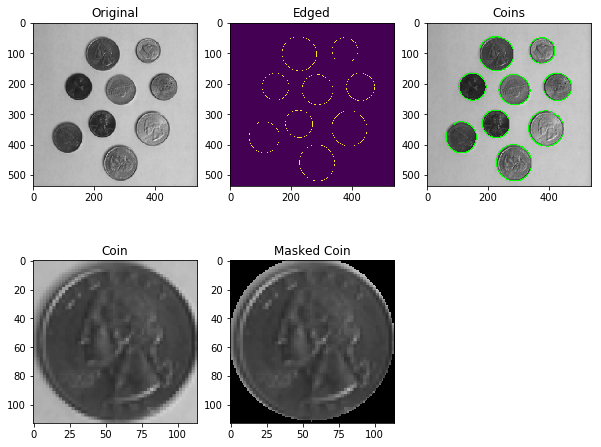

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 8))

image_location = 'coin.png'
image = cv2.imread(image_location)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (15, 15), 0)

plt.subplot(231)
plt.imshow(image)
plt.title("Original")

edged = cv2.Canny(blurred, 30, 150)
plt.subplot(232)
plt.imshow(edged)
plt.title("Edged")

(_, cnts, _) = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("I count {} coins in this image".format(len(cnts)))
#print(cnts)

coins = image.copy()
cv2.drawContours(coins, cnts, -1, (0, 255, 0), 2)
plt.subplot(233)
plt.imshow(coins)
plt.title("Coins")

for (i, c) in enumerate(cnts):
    (x, y, w, h) = cv2.boundingRect(c)
    print("Coin #{}".format(i + 1))
    coin = image[y:y + h, x:x + w]
    plt.subplot(234)
    plt.imshow(coin)
    plt.title("Coin")
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    ((centerX, centerY), radius) = cv2.minEnclosingCircle(c)
    cv2.circle(mask, (int(centerX), int(centerY)), int(radius), 255, -1)
    mask = mask[y:y + h, x:x + w]
    masked = cv2.bitwise_and(coin, coin, mask = mask)
    plt.subplot(235)
    plt.imshow(masked)
    plt.title("Masked Coin")